<a href="https://colab.research.google.com/github/kalijauhari/nlp/blob/prac/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sms spam collection

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/kalijauhari/nlp/main/spam.csv",encoding='latin-1')
df.shape

(5572, 5)

In [2]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5090,ham,"St andre, virgil's cream",NaN,NaN,NaN
1211,ham,Ok then i will come to ur home after half an hour,NaN,NaN,NaN
1722,ham,Thought praps you meant another one. Goodo! I'...,NaN,NaN,NaN
2062,ham,Is there any training tomorrow?,NaN,NaN,NaN
4659,ham,You call him and tell now infront of them. Cal...,NaN,NaN,NaN


In [4]:
#to know the details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
##check missing values columnwise
df.isnull().any(axis=0)

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [6]:
df.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Length: 5572, dtype: bool

In [7]:
#In total how many null values are there
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
5572-5522

50

In [9]:
#In total how many duplicate values are there
df.duplicated().sum()

403

In [10]:
#shat are the columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.columns.to_list()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [12]:
##Data Analysis
1.data Cleaning
2.EDA
3.Text preprocessing
4.Build your model-Naive Bayes Classifier
5.Evaluate the performance of the model
6.Improvement of model
7.Deploy your application in cloud

SyntaxError: ignored

In [13]:
##1.Data Cleaning
##remove the last 3 columns
##inplace=True removes permanently the columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [14]:
df.shape

(5572, 2)

In [15]:
df.sample(1)

,v1,v2
5408,ham,... Are you in the pub?


In [16]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
#rename the columns v1->dependent(target), v2->independent(text)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


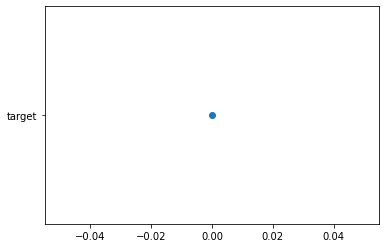

In [19]:
from matplotlib import pyplot as plt
plt.plot('target', marker = 'o')
plt.show()

In [20]:
#fetching the values of each category in target column
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

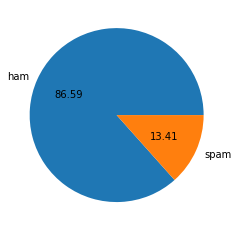

In [21]:
#plot the ratio of ham vs spam in pie chart
from matplotlib import pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [22]:
df.sample(4)

,target,text
3504,ham,"life alle mone,eppolum oru pole allalo"
3114,ham,I wait 4 Ì_ inside da car park...
501,ham,When can Ì_ come out?
4132,spam,FreeMsg Today's the day if you are ready! I'm ...


In [ ]:
#convert the object data into numeric data
#target: nos->One Hot Encoding, Label Encoder,map function, pd.get_dummies
#text: numeric-> BOW, TF-IDF,word2vec,cbow,skipgram,sent2vec

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [24]:
df.sample(4)

,target,text
3868,0,No let me do the math. Your not good at it.
3593,1,Do you want a New Nokia 3510i Colour Phone Del...
3464,0,"Haha figures, well I found the piece and prisc..."
695,0,Good. Good job. I like entrepreneurs
